#Multi-class Image classification

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the mode (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)

In [1]:


from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import zipfile
import pickle
#Unzip our data
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/garbage_classification.zip","r")
zip_ref.extractall()
zip_ref.close()

In [3]:
import os

#Walk through 12 classes of garbage image data
for dirpath,dirnames,filenames in os.walk("/content/garbage_classification"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/garbage_classification'.
There are 12 directories and 0 images in '/content/garbage_classification/train'.
There are 0 directories and 4260 images in '/content/garbage_classification/train/clothes'.
There are 0 directories and 503 images in '/content/garbage_classification/train/green-glass'.
There are 0 directories and 615 images in '/content/garbage_classification/train/metal'.
There are 0 directories and 1582 images in '/content/garbage_classification/train/shoes'.
There are 0 directories and 788 images in '/content/garbage_classification/train/biological'.
There are 0 directories and 713 images in '/content/garbage_classification/train/cardboard'.
There are 0 directories and 620 images in '/content/garbage_classification/train/white-glass'.
There are 0 directories and 756 images in '/content/garbage_classification/train/battery'.
There are 0 directories and 692 images in '/content/garbage_classification/train/plastic'.
There are 0 d

In [4]:
!ls -la /content/garbage_classification

total 16
drwxr-xr-x  4 root root 4096 May  7 19:55 .
drwxr-xr-x  1 root root 4096 May  7 19:55 ..
drwxr-xr-x 14 root root 4096 May  7 19:55 test
drwxr-xr-x 14 root root 4096 May  7 19:55 train


In [5]:
#Setup the train and test directories
train_dir = "/content/garbage_classification/train/"
test_dir = "/content/garbage_classification/test/"

In [6]:
#Let's get class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['battery' 'biological' 'brown-glass' 'cardboard' 'clothes' 'green-glass'
 'metal' 'paper' 'plastic' 'shoes' 'trash' 'white-glass']


In [7]:
#Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  #Setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  #Get a random image path
  random_image= random.sample(os.listdir(target_folder), 1)
  print(random_image)

  #Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") #show the shape of the image

  return img

['metal538.jpg']
Image shape: (183, 275, 3)


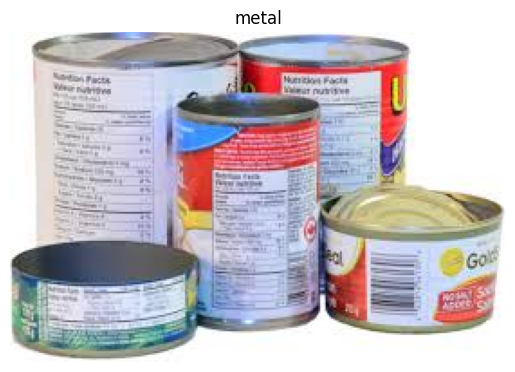

In [8]:
#Visualize,visualize , visualize
import random
img = view_random_image(target_dir = train_dir,
                       target_class = random.choice(class_names))

In [9]:
random.choice(class_names)

'battery'

# 2.Preprocess the data (prepare it for a model)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

#Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size = (224,224),
                                            batch_size=32,
                                            class_mode="categorical")

Found 12413 images belonging to 12 classes.
Found 3102 images belonging to 12 classes.


# 3. Create a model (start with a baseline)

In [11]:
import tensorflow as tf
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Activation

tf.random.set_seed(42)
#Create our model
model_8 = Sequential([
    Conv2D(10,3,input_shape=(224,224,3)),
    Activation(activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(12,activation="softmax") #changed to have 12 output neurons and use the softmax activation function
])

#Compile the model
model_8.compile(loss = "categorical_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics=["accuracy"])


#Fit the model
history_8= model_8.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))


Epoch 1/5
388/388 [==============================] - 44s 100ms/step - loss: 1.4962 - accuracy: 0.5215 - val_loss: 1.3602 - val_accuracy: 0.5596
Epoch 2/5
388/388 [==============================] - 32s 81ms/step - loss: 1.0436 - accuracy: 0.6658 - val_loss: 1.2745 - val_accuracy: 0.6057
Epoch 3/5
388/388 [==============================] - 32s 82ms/step - loss: 0.8007 - accuracy: 0.7453 - val_loss: 1.3941 - val_accuracy: 0.5780
Epoch 4/5
388/388 [==============================] - 32s 82ms/step - loss: 0.5852 - accuracy: 0.8089 - val_loss: 1.3417 - val_accuracy: 0.6289
Epoch 5/5
388/388 [==============================] - 33s 84ms/step - loss: 0.3967 - accuracy: 0.8730 - val_loss: 1.5739 - val_accuracy: 0.6128


In [12]:
len(train_data)

388

In [13]:
#Evaluate on the test data
model_8.evaluate(test_data)

97/97 [==============================] - 6s 64ms/step - loss: 1.5739 - accuracy: 0.6128


[1.5738672018051147, 0.6128304600715637]

In [14]:
#Plot the validation and training curves seperately
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics.
  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  #Plot loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #Plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

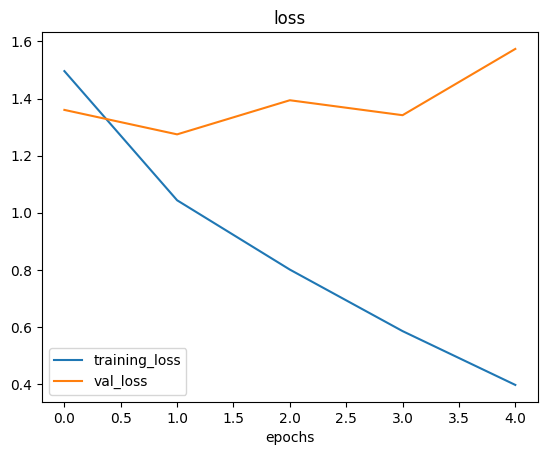

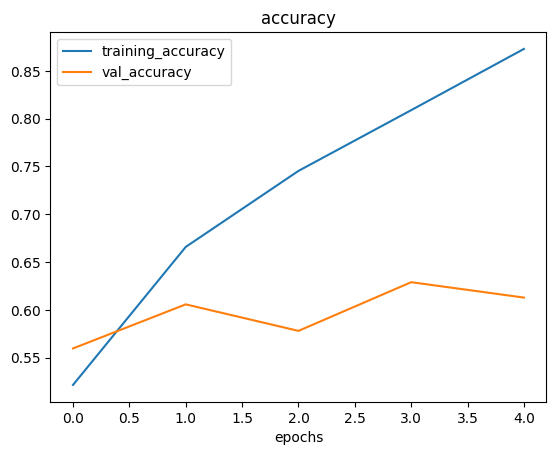

In [15]:
#Check out the model's loss curves

plot_loss_curves(history_8)

In [16]:
model_8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                        

# 6.Adjust the model hyperparameters (to beat the baseline)


In [ ]:
#Simplify the model
#Remove the 2 convolution layers...

tf.random.set_seed(42)
model_9 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(12,activation="softmax")
])

model_9.compile(loss = "categorical_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics=["accuracy"])
#Fit the model with 2x conv layers removed
history_9 = model_9.fit(train_data,
                       epochs=5,
                       steps_per_epoch = len(train_data),
                       validation_data = test_data,
                       validation_steps=len(test_data))

Epoch 1/5
388/388 [==============================] - 37s 89ms/step - loss: 1.3785 - accuracy: 0.5570 - val_loss: 1.3186 - val_accuracy: 0.5732
Epoch 2/5
388/388 [==============================] - 35s 89ms/step - loss: 0.9468 - accuracy: 0.6929 - val_loss: 1.2461 - val_accuracy: 0.6061
Epoch 3/5
388/388 [==============================] - 34s 86ms/step - loss: 0.7252 - accuracy: 0.7680 - val_loss: 1.3127 - val_accuracy: 0.6112
Epoch 4/5
388/388 [==============================] - 36s 92ms/step - loss: 0.5207 - accuracy: 0.8362 - val_loss: 1.3575 - val_accuracy: 0.6096
Epoch 5/5
388/388 [==============================] - 33s 86ms/step - loss: 0.3653 - accuracy: 0.8860 - val_loss: 1.5257 - val_accuracy: 0.6109


In [ ]:
model_9.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 12)               

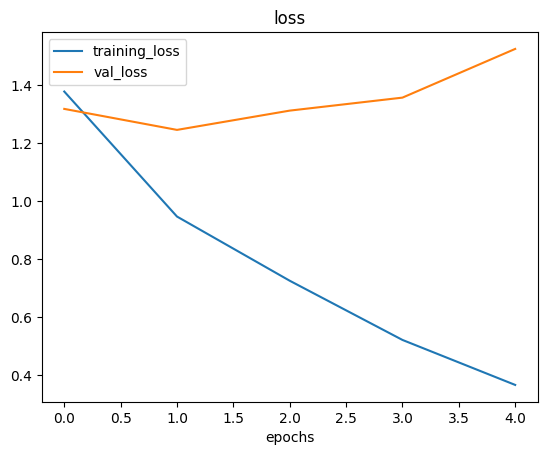

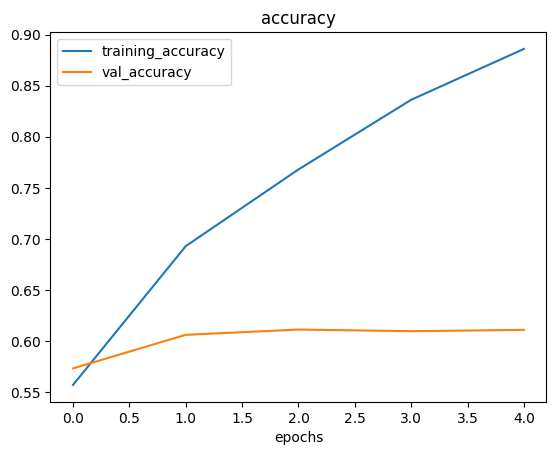

In [ ]:
#Check out the loss curves
plot_loss_curves(history_9)

# Try to reduce overfitting with data augmentation


In [17]:
#Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                            rotation_range=0.2,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            zoom_range = 0.2,
                                            horizontal_flip = True
                                             )

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode="categorical",
                                              shuffle=True)

Found 12413 images belonging to 12 classes.


In [ ]:
#Set random seed
tf.random.set_seed(42)

#Let's create another model but on augmented data
model_10 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(12,activation="softmax")
])


#Compile the cloned model
model_10.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


#Fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
388/388 [==============================] - 172s 437ms/step - loss: 1.6321 - accuracy: 0.4638 - val_loss: 1.4380 - val_accuracy: 0.5364
Epoch 2/5
388/388 [==============================] - 173s 446ms/step - loss: 1.3278 - accuracy: 0.5777 - val_loss: 1.3838 - val_accuracy: 0.5583
Epoch 3/5
388/388 [==============================] - 169s 435ms/step - loss: 1.2688 - accuracy: 0.5906 - val_loss: 1.3506 - val_accuracy: 0.5729
Epoch 4/5
388/388 [==============================] - 170s 438ms/step - loss: 1.2223 - accuracy: 0.6032 - val_loss: 1.3774 - val_accuracy: 0.5693
Epoch 5/5
388/388 [==============================] - 169s 436ms/step - loss: 1.2039 - accuracy: 0.6057 - val_loss: 1.3596 - val_accuracy: 0.5732


In [ ]:
model_8.evaluate(test_data)

97/97 [==============================] - 7s 76ms/step - loss: 1.3986 - accuracy: 0.6338


[1.398593544960022, 0.6337846517562866]

In [ ]:
model_10.evaluate(test_data)

97/97 [==============================] - 6s 66ms/step - loss: 1.3596 - accuracy: 0.5732


[1.359561562538147, 0.5731785893440247]

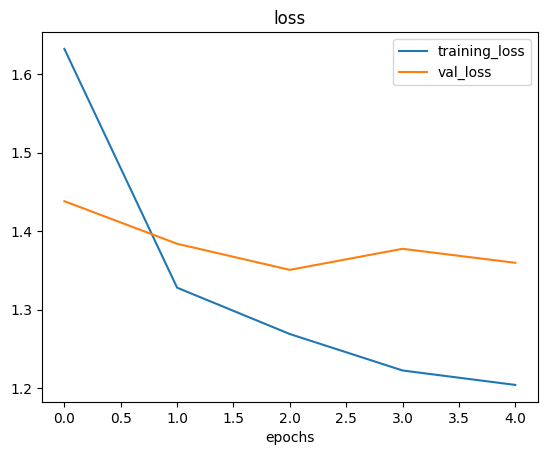

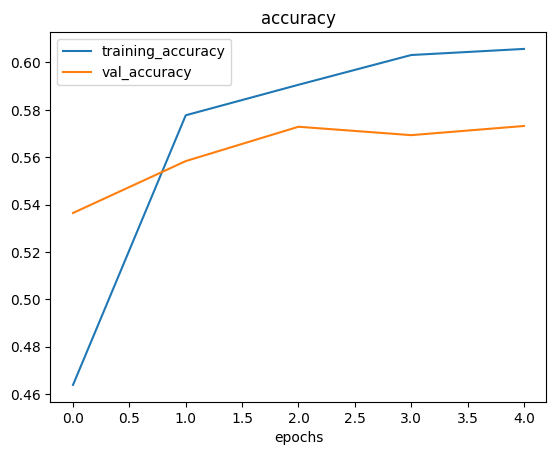

In [ ]:
#Check out our model trained on augmented data's loss curves
plot_loss_curves(history_10)

# 7. Repeat until satisfied

### Making a prediction with our trained model


In [18]:
class_names


array(['battery', 'biological', 'brown-glass', 'cardboard', 'clothes',
       'green-glass', 'metal', 'paper', 'plastic', 'shoes', 'trash',
       'white-glass'], dtype='<U11')

--2024-05-07 19:58:46--  https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-steak.jpeg
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg [following]
--2024-05-07 19:58:47--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2024-05-07 19:58:47 (49.2 MB/s) - ‘03-steak.jpeg’ saved [1978213/19

(-0.5, 3023.5, 4031.5, -0.5)

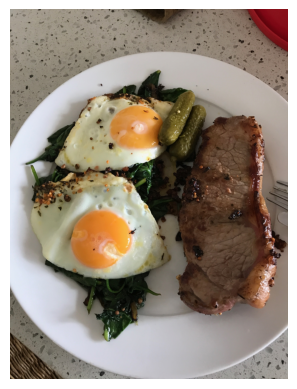

In [19]:
#View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)


In [20]:
#Create a function to import and image and resize it to be able to be used with our model
def load_and_prep_image(filename,img_shape=224):
  """
  Reads an image from file name,turns it into a tensor and reshapes it
  (img_shape,img_shape,colour_channels)
  """

  #Read in the image
  img = tf.io.read_file(filename)
  #Decode the read file into a tensor
  img = tf.image.decode_image(img)
  #Resize the image
  img = tf.image.resize(img,size=[img_shape,img_shape])
  #Rescale the image
  img = img/255.
  return img

In [21]:
def pred_and_plot(model,filename,class_names=class_names):
  """
  Imports an image located at filename ,makes a prediction probability and indexing it on the c;ass names
  """

  #Import the target image and preprocess it
  img = load_and_prep_image(filename)

  #Make a prediction
  pred = model.predict(tf.expand_dims(img,axis=0))


  #Add in logic for multi-class
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]


  #Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction:{pred_class}")
  plt.axis(False)

(-0.5, 3023.5, 4031.5, -0.5)

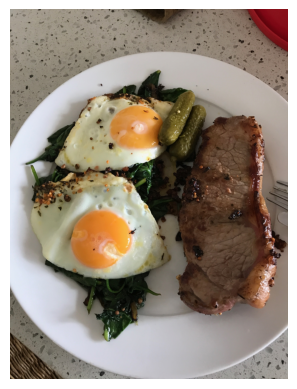

In [22]:
#View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)


In [23]:
#Set random seed
tf.random.set_seed(42)

#Let's create another model but on augmented data
model_18 = Sequential([
    Conv2D(45,3,input_shape=(224,224,3),activation="relu"),
    MaxPool2D(),
    Conv2D(45,3,activation="relu"),
    MaxPool2D(),
    Conv2D(45,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(12,activation="softmax")
])


#Compile the cloned model
model_18.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


#Fit the model
history_18 = model_18.fit(train_data_augmented,
                          epochs=35,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/35
388/388 [==============================] - 174s 438ms/step - loss: 1.5341 - accuracy: 0.5067 - val_loss: 1.4086 - val_accuracy: 0.5477
Epoch 2/35
388/388 [==============================] - 173s 446ms/step - loss: 1.2223 - accuracy: 0.5993 - val_loss: 1.2478 - val_accuracy: 0.5828
Epoch 3/35
388/388 [==============================] - 170s 438ms/step - loss: 1.1268 - accuracy: 0.6271 - val_loss: 1.1582 - val_accuracy: 0.6312
Epoch 4/35
388/388 [==============================] - 169s 437ms/step - loss: 1.0727 - accuracy: 0.6481 - val_loss: 1.1763 - val_accuracy: 0.6383
Epoch 5/35
388/388 [==============================] - 169s 436ms/step - loss: 1.0111 - accuracy: 0.6675 - val_loss: 1.1366 - val_accuracy: 0.6580
Epoch 6/35
388/388 [==============================] - 171s 440ms/step - loss: 0.9688 - accuracy: 0.6796 - val_loss: 1.1296 - val_accuracy: 0.6573
Epoch 7/35
388/388 [==============================] - 172s 443ms/step - loss: 0.9272 - accuracy: 0.6987 - val_loss: 1.1716 -

# Saving and loading our model

In [24]:
#Save a model
model_18.save("ecosort_model")

In [ ]:
# #Load in a trained model and evaluate it
# loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
# loaded_model_10.evaluate(test_data)

In [39]:
#Compare our loaded model to our existing model
model_18.evaluate(test_data)

97/97 [==============================] - 8s 80ms/step - loss: 0.8928 - accuracy: 0.7544


[0.8927829265594482, 0.7543520331382751]

In [25]:
model_18.save("ecosort.h5")

# Save class names as a pickle file
with open('class_names.pkl', 'wb') as file:
    pickle.dump(class_names, file)

# Load the saved model and class names
loaded_model = tf.keras.models.load_model("ecosort_model")

# Load the class names from the pickle file
with open('class_names.pkl', 'rb') as file:
    loaded_class_names = pickle.load(file)

# Check if the loaded class names match the original class names
if (class_names == loaded_class_names).all():
    print("Class names loaded successfully.")
else:
    print("Error loading class names.")

# Check the loaded model's performance
loaded_model.evaluate(test_data)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Class names loaded successfully.
97/97 [==============================] - 7s 65ms/step - loss: 0.8928 - accuracy: 0.7544


[0.8927830457687378, 0.7543520331382751]

In [37]:
import pandas as pd

# Convert the history.history dict to a pandas DataFrame
hist_df = pd.DataFrame(history_18.history)

# Save to json
hist_df.to_json('history_18.json')

# Or save to csv
hist_df.to_csv('history_18.csv')

In [31]:
!zip -r /content/ecosort_model.zip /content/ecosort_model


  adding: content/ecosort_model/ (stored 0%)
  adding: content/ecosort_model/fingerprint.pb (stored 0%)
  adding: content/ecosort_model/assets/ (stored 0%)
  adding: content/ecosort_model/saved_model.pb (deflated 88%)
  adding: content/ecosort_model/.zip (stored 0%)
  adding: content/ecosort_model/keras_metadata.pb (deflated 91%)
  adding: content/ecosort_model/variables/ (stored 0%)
  adding: content/ecosort_model/variables/variables.data-00000-of-00001 (deflated 10%)
  adding: content/ecosort_model/variables/variables.index (deflated 62%)


In [32]:
from google.colab import files
files.download("/content/ecosort_model.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
model_18.evaluate(test_data)

97/97 [==============================] - 6s 60ms/step - loss: 0.8928 - accuracy: 0.7544


[0.892782986164093, 0.7543520331382751]

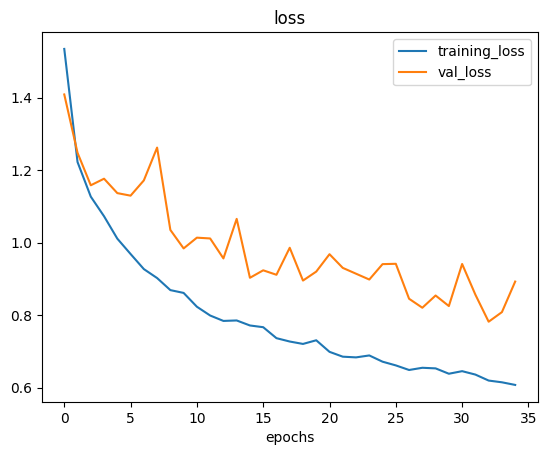

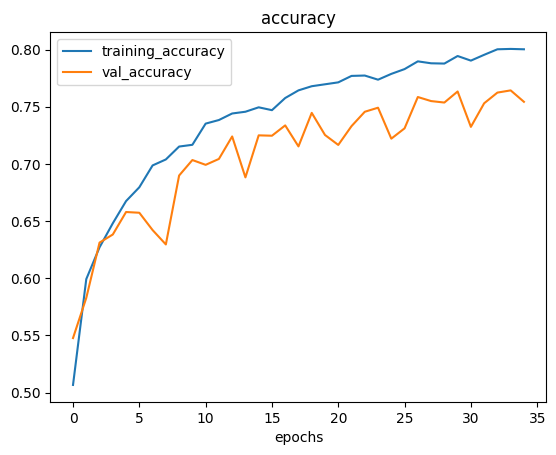

In [36]:
plot_loss_curves(history_18)

In [41]:
zip_file = "/content/drive/MyDrive/images.zip"
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("/content/images/")

In [42]:
def multiple_pred_and_plot(model, directory, class_names):
    """
    Imports an image located at filename, makes a prediction and plots the image with its predicted label.
    """

    # Get all the image file names from the directory
    image_files = os.listdir(directory)

    # Loop over all the images
    for image_file in image_files:

        # Full path to the image file
        filename = os.path.join(directory, image_file)

        # Import the target image and preprocess it
        img = load_and_prep_image(filename)

        # Make a prediction
        pred = model.predict(tf.expand_dims(img, axis=0))

        # Add in logic for multi-class
        if len(pred[0]) > 1:
            pred_class = class_names[tf.argmax(pred[0])]
        else:
            pred_class = class_names[int(tf.round(pred[0]))]

        # Plot the image and predicted class
        plt.figure()
        plt.imshow(img)
        plt.title(f"Prediction: {pred_class}")
        plt.axis(False)
        plt.show()

1/1 [==============================] - 0s 18ms/step


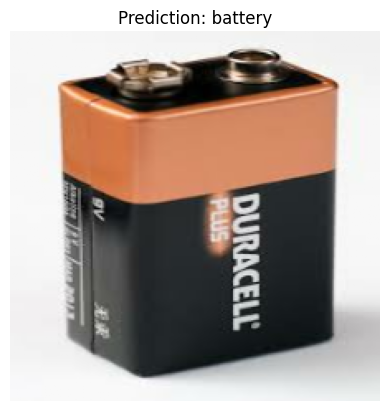

1/1 [==============================] - 0s 17ms/step


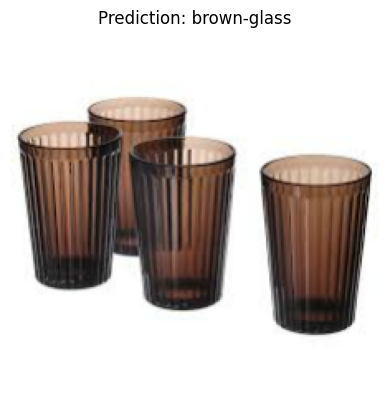

1/1 [==============================] - 0s 20ms/step


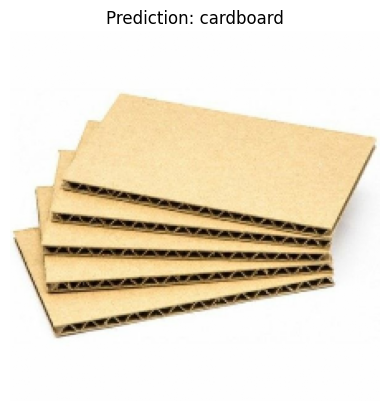

1/1 [==============================] - 0s 20ms/step


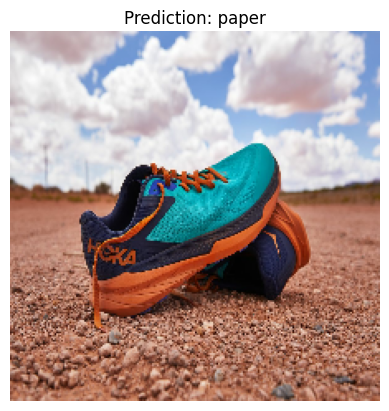

1/1 [==============================] - 0s 24ms/step


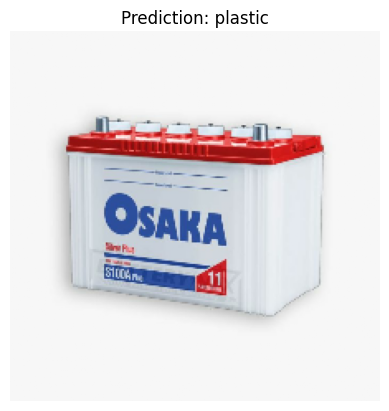

1/1 [==============================] - 0s 21ms/step


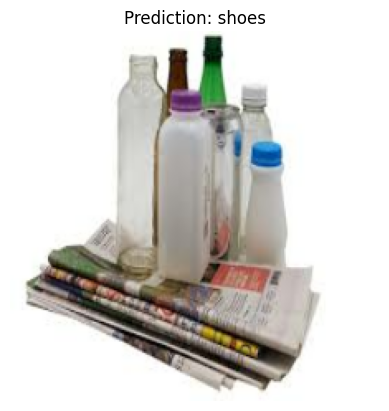

1/1 [==============================] - 0s 20ms/step


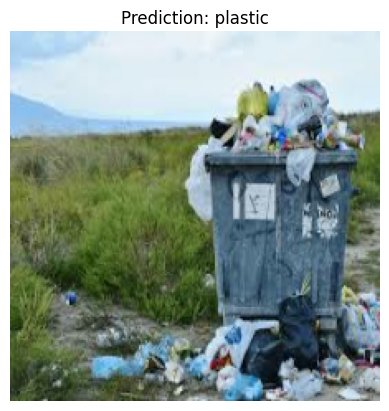

1/1 [==============================] - 0s 20ms/step


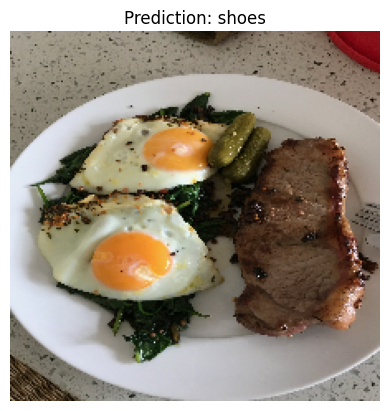

1/1 [==============================] - 0s 24ms/step


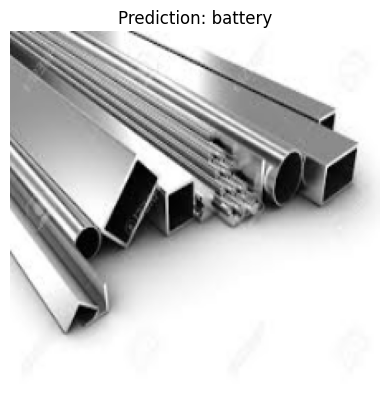

1/1 [==============================] - 0s 18ms/step


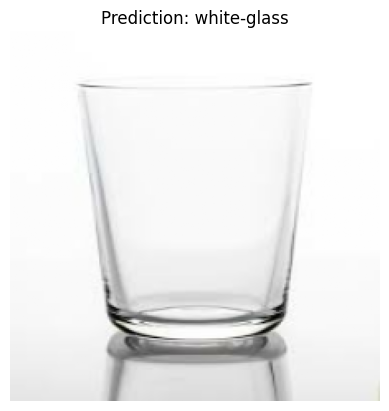

In [43]:
multiple_pred_and_plot(model=model_18, directory="/content/images", class_names=class_names)